In [18]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from scipy import sparse
from gensim import corpora
from gensim.models import LdaMulticore, LdaModel
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load previosly created dataframe
df = pd.read_csv('../data/df_eng_1000.csv',index_col=0, encoding='utf-8')

In [4]:
grouped = df.groupby('track_id')
# Create list of lists
data_list = []
for name, group in grouped:
    track_list = []
    for i in range(len(group)):
        for j in range(group.iloc[i]['count']):
            track_list.append(group.iloc[i]['word'])
    random.shuffle(track_list)
    data_list.append(track_list)
    

In [5]:
id2words = corpora.Dictionary(data_list)
corpus = []
for text in data_list:
    new = id2words.doc2bow(text)
    corpus.append(new)

In [6]:
train_corpus, test_corpus = train_test_split(corpus, test_size=0.1)

In [25]:
models = []
results = []
topics = [5,10,15,20,30,40,50,60,70,80,100]
alphas = [0.01,0.1]
for topic in topics:
    for alpha in alphas:
        lda_model = LdaMulticore(
            corpus=train_corpus,
            id2word=id2words,
            num_topics=topic,
            passes=15,
            alpha=alpha,
            eta=0.0001
        )
        perp = lda_model.log_perplexity(test_corpus)
        results.append(tuple([topic, alpha, perp]))
        models.append(lda_model)

In [20]:
results_c = [result + (np.exp(-1. * result[2]),) for result in results]

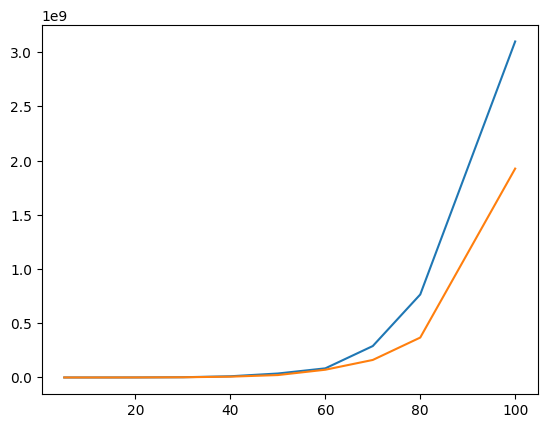

In [21]:

a001 = [result[3] for result in results_c if result[1] == 0.01]
a01 = [result[3] for result in results_c if result[1] == 0.1]
plt.plot(topics,a001)
plt.plot(topics,a01)
plt.show()

In [22]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(models[4], train_corpus, id2words, mds="mmds", R=8)

/home/jmoeh/projects/genre-topic-modelling/venv/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/jmoeh/projects/genre-topic-modelling/venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.188346 -0.007586       1        1  13.370311
0      0.013450  0.048260       2        1  11.402560
3     -0.065185 -0.003159       3        1   9.257000
6      0.051011 -0.059777       4        1   8.114153
13     0.206083 -0.099665       5        1   7.805353
4      0.205085  0.005473       6        1   6.393367
14     0.139514  0.084868       7        1   6.336860
10     0.103512 -0.166608       8        1   6.068002
9     -0.137596 -0.099555       9        1   5.729025
2     -0.129504 -0.210854      10        1   5.441345
5     -0.065633  0.145373      11        1   5.422584
8     -0.241571  0.109193      12        1   4.529465
1      0.145352  0.221478      13        1   3.854339
12     0.016297 -0.257188      14        1   3.394431
11    -0.052469  0.289746      15        1   2.881204, topic_info=       Term        Freq       Total Category  logprob  loglift
96     love  767.000000  767.000000  Default   8.0000   8.0000
2335     la  148.000000  148.000000  Default   7.0000   7.0000
32       oh  377.000000  377.000000  Default   6.0000   6.0000
638   lyric  119.000000  119.000000  Default   5.0000   5.0000
132     let  413.000000  413.000000  Default   4.0000   4.0000
...     ...         ...         ...      ...      ...      ...
1335   soft   16.795396   34.054020  Topic15  -4.4484   2.8401
102     old   23.685152   83.250603  Topic15  -4.1047   2.2900
96     love   27.858271  767.992342  Topic15  -3.9424   0.2303
100   never   21.486695  316.840764  Topic15  -4.2021   0.8560
27     like   17.351171  475.266226  Topic15  -4.4159   0.2367

[307 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1758      9  0.778480    aah
2643      1  0.822424  accid
1880      2  0.176241  advic
1880      8  0.704964  advic
2454      3  0.877192  alter
...     ...       ...    ...
193      11  0.047647   yeah
193      12  0.014660   yeah
193      13  0.051312   yeah
193      15  0.003665   yeah
880      11  0.805367   york

[1447 rows x 3 columns], R=8, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 4, 7, 14, 5, 15, 11, 10, 3, 6, 9, 2, 13, 12])

In [24]:
print(models[4].print_topics())

[(0, '0.037*"love" + 0.026*"know" + 0.015*"yeah" + 0.015*"feel" + 0.012*"see" + 0.011*"alway" + 0.011*"never" + 0.010*"make" + 0.009*"come" + 0.009*"take"'), (1, '0.076*"la" + 0.036*"oh" + 0.025*"love" + 0.019*"le" + 0.013*"believ" + 0.012*"back" + 0.012*"rain" + 0.011*"let" + 0.011*"name" + 0.010*"blow"'), (2, '0.036*"fire" + 0.023*"ride" + 0.021*"want" + 0.018*"still" + 0.018*"hate" + 0.017*"high" + 0.013*"come" + 0.013*"babi" + 0.012*"burn" + 0.010*"home"'), (3, '0.018*"see" + 0.016*"way" + 0.014*"want" + 0.014*"cunt" + 0.010*"yeah" + 0.010*"time" + 0.010*"lyric" + 0.010*"day" + 0.009*"fall" + 0.009*"tell"'), (4, '0.035*"time" + 0.023*"give" + 0.017*"hell" + 0.016*"know" + 0.015*"come" + 0.015*"one" + 0.014*"hope" + 0.011*"life" + 0.010*"day" + 0.010*"tell"'), (5, '0.030*"like" + 0.016*"satisfi" + 0.013*"friend" + 0.012*"time" + 0.011*"come" + 0.011*"world" + 0.010*"head" + 0.010*"end" + 0.009*"bring" + 0.009*"know"'), (6, '0.021*"know" + 0.020*"day" + 0.015*"cri" + 0.014*"like" + 0